**Hands on!**

**Mobile Device Usage and User Behavior Dataset**

The Kaggle dataset on mobile device usage and user behavior provides data on app usage time, device types, and various behavioral metrics. Here are a few hypotheses for analyzing this dataset:

**Hypothesis 1:** As user age increases, daily screen time decreases.

    To test this hypothesis, the correlation between age and screen time can be examined. Observing whether screen time decreases with age could provide insights into user habits.

**Hypothesis 2:** Android users consume more data than iOS users.

    This hypothesis tests whether there is a difference in daily data usage between Android and iOS users. Analyzing the data usage habits of Android versus iOS users may reveal interesting insights.

**Hypothesis 3:** The number of installed apps increases daily battery drain.

    By examining the relationship between the number of installed apps and battery drain, we can assess whether having more apps on the device impacts battery usage.

**Hypothesis 4:** Male users tend to use more apps than female users.

    This hypothesis explores the relationship between gender and the number of installed apps. It can show whether there are differences in app usage habits between male and female users.

[https://www.kaggle.com/datasets/valakhorasani/mobile-device-usage-and-user-behavior-dataset](http://)

In [46]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.stats import pearsonr,ttest_ind
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

%matplotlib inline

**Loading our data:**

In [47]:
usage=pd.read_csv('/kaggle/input/mobile-device-usage-and-user-behavior-dataset/user_behavior_dataset.csv')

**The data at a glance:**

In [48]:
usage.head() 

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [49]:
usage.shape

(700, 11)

In [50]:
usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [51]:
usage.describe()

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,202.21688,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,1.00000,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,175.75000,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,350.50000,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,525.25000,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,700.00000,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


**Hypothesis 1:** **As user age increases, daily screen time decreases.**

To test this hypothesis, the correlation between age and screen time can be examined. Observing whether screen time decreases with age could provide insights into user habits.

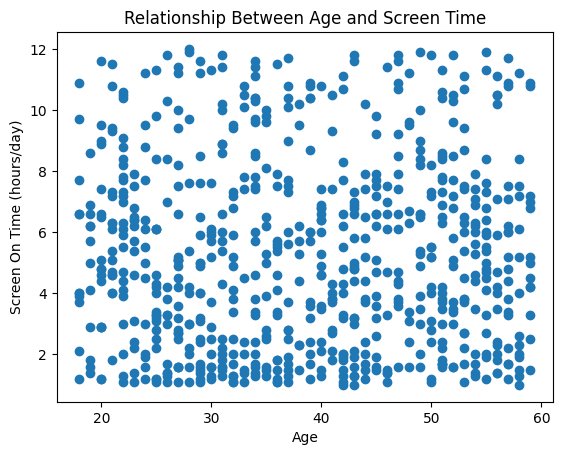

In [52]:
# Scatter plot of Age vs Screen Time
plt.scatter(usage['Age'], usage['Screen On Time (hours/day)'])
plt.title("Relationship Between Age and Screen Time")
plt.xlabel("Age")
plt.ylabel("Screen On Time (hours/day)")
plt.show()

**Distribution:** The data points appear to be widely spread across different screen time values, with no obvious trend or pattern that shows an increase or decrease in screen time as age changes. This suggests that *screen time does not have a strong linear relationship with age* in this dataset.

**Clustering:** The points are relatively evenly distributed, which implies there may not be a clear age-based trend in screen time.

In [53]:
correlation = usage['Age'].corr(usage['Screen On Time (hours/day)'])
print(f"Pearson Correlation between Age and Screen Time: {correlation}")

Pearson Correlation between Age and Screen Time: 0.017232227932845807


*Pearson Correlation between Age and Screen Time: 0.017232227932845807*

The Pearson correlation coefficient of 0.0172 between Age and Screen Time suggests a very weak positive linear relationship between the two variables. Since this value is very close to 0, it indicates that there is almost no linear correlation between age and screen time in the dataset being analyzed. In other words, age does not appear to have a meaningful relationship with screen time based on this analysis.

**Hypothesis 2: Android users consume more data than iOS users.**

This hypothesis tests whether there is a difference in daily data usage between Android and iOS users. Analyzing the data usage habits of Android versus iOS users may reveal interesting insights.

In [54]:
usage.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [55]:
# Split data into Android and iOS users
android_data = usage[usage['Operating System'] == 'Android']['Data Usage (MB/day)']
ios_data = usage[usage['Operating System'] == 'iOS']['Data Usage (MB/day)']

In [56]:
# Perform a t-test (assuming the data is normally distributed)
t_stat, p_value = stats.ttest_ind(android_data, ios_data)

In [57]:
# Output the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: -0.7582249244375379
P-value: 0.44857226744547174


In [58]:
# If p-value < 0.05, there is a significant difference
if p_value < 0.05:
    print("There is a significant difference in data usage between Android and iOS users.")
else:
    print("There is no significant difference in data usage between Android and iOS users.")

There is no significant difference in data usage between Android and iOS users.


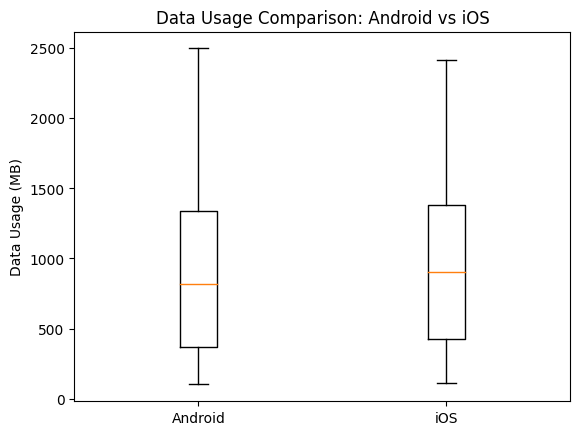

In [59]:
# Plot the comparison using a simple boxplot
plt.boxplot([android_data, ios_data], labels=['Android', 'iOS'])
plt.title('Data Usage Comparison: Android vs iOS')
plt.ylabel('Data Usage (MB)')
plt.show()

The statistical analysis, combined with the box plot insights, suggests that *there is no significant difference in daily data usage between Android and iOS users*. Although Android users exhibit a broader range of data consumption patterns, on average, both platforms have similar data usage. Therefore, Hypothesis 2 is not supported by the data. Android users do not consume more data than iOS users in a statistically significant way.

**Hypothesis 3: The number of installed apps increases daily battery drain.**

By examining the relationship between the number of installed apps and battery drain, we can assess whether having more apps on the device impacts battery usage.

In [60]:
usage.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


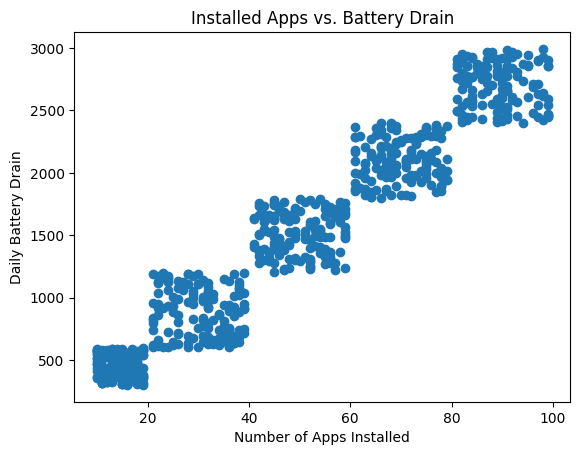

In [61]:
# Scatter plot
plt.scatter(usage['Number of Apps Installed'], usage['Battery Drain (mAh/day)'])
plt.xlabel('Number of Apps Installed')
plt.ylabel('Daily Battery Drain')
plt.title('Installed Apps vs. Battery Drain')
plt.show()

In [62]:
# Correlation
correlation, p_value = pearsonr(usage['Number of Apps Installed'], usage['Battery Drain (mAh/day)'])
print(f"Correlation: {correlation}, P-value: {p_value}")

Correlation: 0.9618532619047162, P-value: 0.0


In [63]:
# Interpretation
if p_value < 0.05:
    print("Significant relationship: More apps likely increase battery drain.")
else:
    print("No significant relationship: Number of apps does not significantly impact battery drain.")

Significant relationship: More apps likely increase battery drain.


These results support Hypothesis 3: *the number of installed apps is associated with an increase in daily battery drain*. The strong, statistically significant correlation suggests that having more apps installed may indeed lead to higher battery usage.

**Hypothesis 4: Male users tend to use more apps than female users.**

This hypothesis explores the relationship between gender and the number of installed apps. It can show whether there are differences in app usage habits between male and female users.

In [64]:
usage.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [65]:
# Separate data based on gender
male_apps = usage[usage['Gender'] == 'Male']['Number of Apps Installed']
female_apps = usage[usage['Gender'] == 'Female']['Number of Apps Installed']

<Figure size 800x600 with 0 Axes>

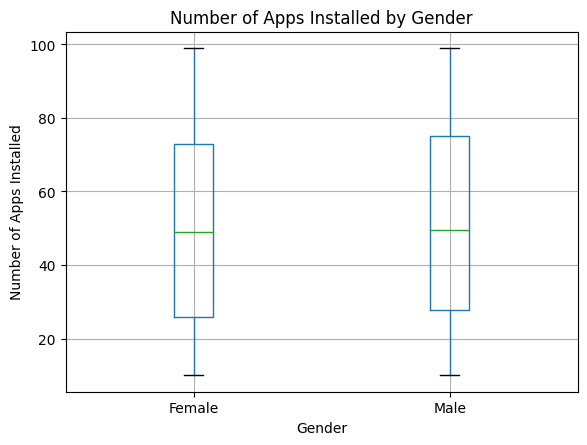

In [66]:
# Visualize with a box plot
plt.figure(figsize=(8, 6))
usage.boxplot(column='Number of Apps Installed', by='Gender')
plt.title("Number of Apps Installed by Gender")
plt.suptitle('')
plt.ylabel("Number of Apps Installed")
plt.show()

In [69]:
# Perform independent samples t-test
t_stat, p_value = ttest_ind(male_apps, female_apps)

In [70]:
# Output the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 0.4292416185449481
P-value: 0.6678798537394364


In [72]:
# Interpretation
if p_value < 0.05:
    print("There is a significant difference in the number of installed apps between male and female users.")
else:
    print("There is no significant difference in the number of installed apps between male and female users.")

There is no significant difference in the number of installed apps between male and female users.


* Since the p-value is 0.668, which is greater than 0.05, we fail to reject the null hypothesis. This result indicates that *there is no significant difference in the number of installed apps between male and female users.*

* In other words, based on this test, *gender does not appear to influence the number of apps installed* in a statistically meaningful way. Any observed difference is likely due to random chance rather than a true effect of gender on app usage.